# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
n = (np.shape(x)[0]) #Amount of data points

def designMatrix(Am, xv):#Am is first dim of A xv is a vector of data
    n = (np.shape(xv)[0])
    dM = np.zeros((n, Am))
    mv = np.arange(Am)#powers from 0 to Am
    for i in range(n):
        dM[i] = xv[i] ** mv #forming basis functions
    return dM

def makeBetaVector(Am, xv): #Constructs the normal system of equations and solves it
    A = designMatrix(Am, xv)#Am is first dim of A xv is a vector of data
    #A_T @ A @ b_vect = A_t @ y
    eqMatrix = A.T @ A
    eqVector = A.T @ y
    betaVector = np.linalg.solve(eqMatrix, eqVector)
    return betaVector

#f(x, b_vect) = sum{i from 1 to m}(b[i] * fi[i]) = b_vect @ f_vect

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

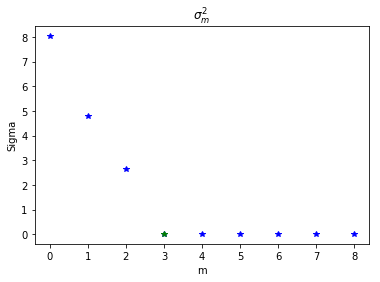

In [3]:
def Pm(m0, x0, beta): #P_m(x_k)
    return beta @ x0**np.arange(m0)

def sigma(m0, xv, yv): #!Here m0 means tha same as in the description above: the highrst power of polynom
    m0 += 1#that is the reason why Am = m0 + 1
    betaVector = makeBetaVector(m0, xv)
    mv = np.arange(m0)#powers from 0 to m0
    sigma = 0
    for j in range(n):
        z = (-yv[j] + Pm(m0, x[j], betaVector))**2
        sigma += z
    return sigma/(n - m0)

eps = []
m_range = np.arange(9) 
for m in m_range:
    eps.append(sigma(m, x, y))
plt.plot(m_range, eps, "*", color='blue')
plt.title('$\sigma_m^2$')
plt.xlabel('m')
plt.ylabel('Sigma')
mBest = 3 #As we can se from graph, first good value is m=3
plt.plot(mBest, eps[mBest], '*', color='green')

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

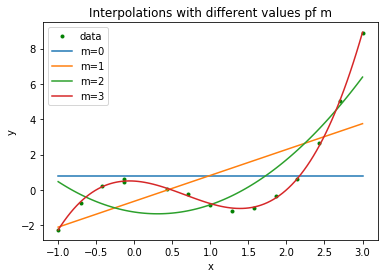

In [4]:
m_range = m_range[:4]
plt.plot(x, y, '.', color='green', label='data')

xScale = np.linspace(x[0], x[-1], 100)
for m in m_range:
    Am = m + 1
    yScale = []
    betaVector = makeBetaVector(Am, x)
    for point in xScale:
        yScale.append(Pm(Am, point, betaVector))
    plt.plot(xScale, yScale, label='m='+str(m))

plt.title('Interpolations with different values pf m')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

Coefficients of polynom found with QR: [ 0.49483598 -0.26983377 -2.01973166  1.01540301]
Old coefficients found from the normal eqations [ 0.49483598 -0.26983377 -2.01973166  1.01540301]
Difference between this two vectors 2.2283838334298714e-14

As we can see, difference is nearly 0, so results are the same.


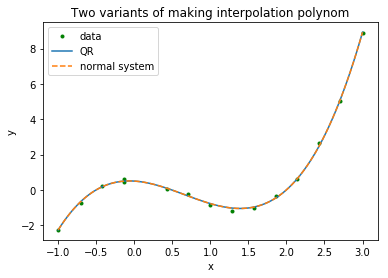

In [5]:
m = 3
Am = m + 1
A = designMatrix(Am, x)
Q, R = np.linalg.qr(A)
yRotated = Q.T @ y
betaQr = np.linalg.solve(R, yRotated)
beta = makeBetaVector(Am,x)
print('Coefficients of polynom found with QR:', betaQr)
print('Old coefficients found from the normal eqations', beta)
print('Difference between this two vectors', np.linalg.norm(betaQr - beta))
print('\nAs we can see, difference is nearly 0, so results are the same.')
#Picture
yScale1 = []
yScale2 = []
betaVector = makeBetaVector(Am, x)
for point in xScale:
    yScale1.append(Pm(Am, point, betaQr))
    yScale2.append(Pm(Am, point, betaVector))
plt.plot(x, y, '.', color='green', label='data')
plt.plot(xScale, yScale1, label="QR")
plt.plot(xScale, yScale2, '--', label="normal system")
plt.title('Two variants of making interpolation polynom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

Visually third polynom interpolates our function


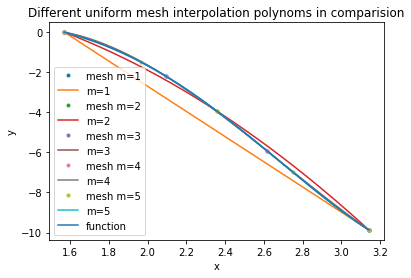

In [6]:
def f(x):
    return x**2*np.cos(x)

def Ln(x, k, Xk):
    y = 1
    for i in range (len(Xk)) :
        if i != k and Xk[k]-Xk[i]!=0:
            y*=((x - Xk[i])/ (Xk[k]-Xk[i]))
    return y

def F(Xnew, Xs, Ys):
    return sum(Ys[i]*Ln(Xnew, i, Xs) for i in range(len(Xs)))

def drawUniform(dots, begin=np.pi/2, end=np.pi):
    x_data = np.linspace (begin, end, dots)
    y_data = [f(x) for x in x_data]
    x_list = np.linspace (np.pi/2, np.pi, 700)
    y_list = [F(i, x_data, y_data) for i in x_list]
    return x_list, y_list

for m in range(1,6):
    x_data = np.linspace (np.pi/2, np.pi, Am)
    y_data = [f(x) for x in x_data]
    plt.plot (x_data, y_data, ".", label='mesh m='+str(m))
#Also Am means nubber of dots needed for making interpolation polynom degree m    
    Am = m + 1
    x, y = drawUniform(Am)
    plt.plot (x, y, '-', label='m='+str(m))
    
x_list = np.linspace(np.pi/2, np.pi, 100)
plt.plot(x_list, x_list**2*np.cos(x_list), label = 'function')

plt.title('Different uniform mesh interpolation polynoms in comparision')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print('Visually third polynom interpolates our function')

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

it is very hard to make decision about the quality of interpolation, because two curves are very similar


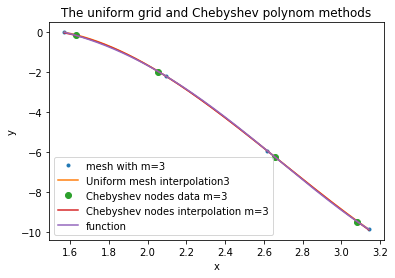

In [7]:
def drawCheb(knots, begin=np.pi/2, end=np.pi):
    x_data = [0.5*(begin + end + (end-begin)*np.cos(np.pi*(2*n+1)/(2*(knots)))) for n in range(0, knots)]
    y_data = [f(x) for x in x_data]
    x_list = np.linspace (begin, end, 700)
    y_list = [(F(i, x_data, y_data)) for i in x_list]
    return x_list, y_list, x_data

m = 3
Am = m + 1 #Also Am means number of dots we need for making interpolation polynom degree m    
    

xUniform, yUniform = drawUniform(Am)
x_data = np.linspace (np.pi/2, np.pi, Am)
y_data = [f(x) for x in x_data]
plt.plot (x_data, y_data, ".", label='mesh with m='+str(m))
plt.plot (xUniform, yUniform, label='Uniform mesh interpolation'+str(m))
    
xCheb, yCheb, x_grid = drawCheb(Am)    
plt.plot (x_grid, [f(x) for x in x_grid], "o", label='Chebyshev nodes data m='+str(m))
plt.plot (xCheb, yCheb, '-', label='Chebyshev nodes interpolation m='+str(m))
plt.plot (xUniform, [f(x) for x in xUniform], label='function')

plt.title('The uniform grid and Chebyshev polynom methods')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print('it is very hard to make decision about the quality of interpolation, because two curves are very similar')

Here we can see that second polynomial is already very similar to the function. So this method is better then using uniform mesh.


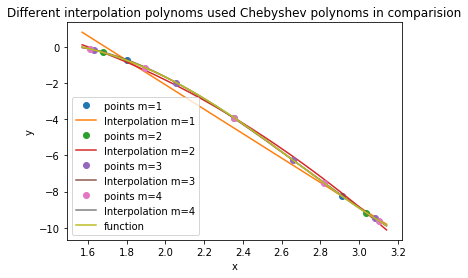

In [8]:
for m in range(1, 5):
    Am = m + 1
    xCheb, yCheb, x_grid = drawCheb(Am)    
    plt.plot (x_grid, [f(x) for x in x_grid], "o", label='points m='+str(m))
    plt.plot (xCheb, yCheb, '-', label='Interpolation m='+str(m))
plt.plot (xUniform, [f(x) for x in xUniform], label='function')
plt.title('Different interpolation polynoms used Chebyshev polynoms in comparision')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print('Here we can see that second polynomial is already very similar to the function. So this method is better then using uniform mesh.')

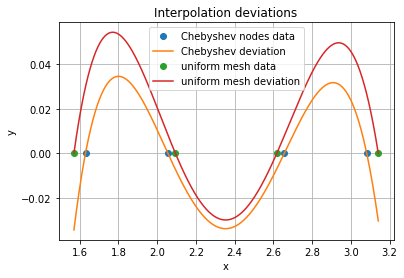

In [9]:
def check(m, begin=np.pi/2, end=np.pi):
    dots = m + 1 #The number of dots is equal to Am
    x_data = [0.5*(begin + end + (end-begin)*np.cos(np.pi*(2*n+1)/(2*(dots)))) for n in range(0, dots)]
    y_data = np.array([x**2*np.cos(x) for x in x_data])
    x_list = np.linspace (begin, end, 700)
    f=np.array([(F(i, x_data, y_data)) for i in x_list])
    plt.plot (x_data, [0 for x in x_data], "o", label='Chebyshev nodes data')
    plt.plot (x_list, f-x_list**2*np.cos(x_list), label='Chebyshev deviation')
    
    x_data = np.linspace (begin, end, dots)
    y_data = [x**2*np.cos(x) for x in x_data]
    f = np.array([F(i, x_data, y_data) for i in x_list])
    plt.plot (x_data, [0 for x in x_data], "o", label='uniform mesh data')
    plt.plot (x_list, f-x_list**2*np.cos(x_list), '-', label='uniform mesh deviation')
    plt.grid()
    plt.title('Interpolation deviations')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
check(3)

We can make a fnal decision that the second method(using Chebyshev polynoms) interpolates our function the best way.